### Tracking CTW's at surface

Animation of surface-ish U, V, W and ssh induced by the canyon along 15 days.

In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

In [2]:
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL/01_noSVB_febTS/'

levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels)
ds2 = open_mdsdataset(outdir2, prefix=['eta','dynVars'], levels=levels)

In [3]:
depth_nob = ds2.Depth[:]
LAT = ds2['YC'][:]
LON = ds2['XC'][:]-360
lat = ds2.YC[:,0].data
lon = ds2.XC[0,:].data-360

Z = ds2['Z'][:]
Zl = ds2['Zl'][:]

# centers mask
hFacC = ds2['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth_nob,0)
mask_dep = np.ma.getmask(dep_masked)

times1 = np.arange(720)*600
times2 = np.arange(720)*1200+(720*600)
times = np.concatenate((times1,times2))

# centers mask bathy with bay
depth_bay = ds.Depth[:]
hFacCSVB = ds['hFacC'][:]
hfacSVB = np.ma.masked_values(hFacCSVB, 0)
maskSVB = np.ma.getmask(hfacSVB)

In [4]:
def get_snapshot_at_level(ds,tt,zz,fld):
    W = ds[fld][tt,zz,:,:]
    return(W)

def get_snapshot_eta(ds,tt):
    Eta = ds['ETAN'][tt,:,:]
    return(Eta)

def plot_field_w(ax,tt,lon,lat,fld,time,mask,zind,title,
                 cmap=cmo.cm.balance,vmin=-0.3, vmax=0.3, cb=1):
    ax.set_facecolor('tan')
    pc = ax.pcolormesh(lon,lat, 
                       np.ma.masked_array(fld,mask=mask[zind,:,:]),
                       cmap=cmap, vmin=vmin, vmax=vmax)
    ax.contour(lon,lat,depth_nob, levels=[0], color='k')
    ax.contour(lon,lat,depth_bay, levels=[0], color='0.5')
     
    if cb==1:
        norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
        cbar_ax = fig.add_axes([0.48, 0.52, 0.022, 0.36])
        cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
                          cax=cbar_ax,
                          orientation='vertical', 
                          format='%1.2f')
    elif cb==2:
        norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
        cbar_ax = fig.add_axes([0.905, 0.52, 0.022, 0.36])
        cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
                          cax=cbar_ax,
                          orientation='vertical', 
                          format='%1.2f')
    elif cb==3:
        norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
        cbar_ax = fig.add_axes([0.48, 0.125, 0.022, 0.36])
        cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
                          cax=cbar_ax,
                          orientation='vertical', 
                          format='%1.2f')
    else:
         norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
         cbar_ax = fig.add_axes([0.905, 0.125, 0.022, 0.36])
         cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
                           cax=cbar_ax,
                           orientation='vertical', 
                           format='%1.2f')
    
    ax.set_title(title)
    ax.set_aspect(1)
    return(ax)

def init():
    tt=0
    Eta_bay = get_snapshot_eta(ds, 0)
    Eta_nb = get_snapshot_eta(ds2, 0)
    
    Wbay = get_snapshot_at_level(ds, 0, zz2, 'WVEL')
    Wnb = get_snapshot_at_level(ds2, 0, zz2, 'WVEL')
     
    Ubay = get_snapshot_at_level(ds, 0, zz, 'UVEL')
    Unb = get_snapshot_at_level(ds2, 0, zz, 'UVEL')
   
    Vbay = get_snapshot_at_level(ds, 0, zz, 'VVEL')
    Vnb = get_snapshot_at_level(ds2, 0, zz, 'VVEL')
   
     
    axx = plot_field_w(ax1,tt,lon,lat,(Eta_bay-Eta_nb)*100,times,
                      mask,zz,
                      'SSH (cm) at t=%1.1f h'%(times[tt]/3600),
                      cmap=cmo.cm.curl, vmin=-0.3, vmax=0.3, cb=1)
    axx2 = plot_field_w(ax2,tt,lon,lat,(Wbay-Wnb)*1E5,times,
                        mask,zz2,
                        r'$w$ ($10^{-5}$ ms$^{-1}$) at %1.1f m '%(Zl[zz2]),
                        cmap=cmo.cm.balance, vmin=-1, vmax=1, cb=2)
    axx3 = plot_field_w(ax3,tt,lon,lat,(Ubay-Unb)*100,times,
                        mask,zz,
                        'Surface u (cm$~$s$^{-1}$) at t=%1.1f h'%(times[tt]/3600) ,
                         cmap=cmo.cm.balance, vmin=-0.1, vmax=0.1, cb=3)
    axx3 = plot_field_w(ax4,tt,lon,lat,(Vbay-Vnb)*100,times,
                        mask,zz,
                        'Surface v (cm$~$s$^{-1}$) at t=%1.1f h'%(times[tt]/3600) ,
                         cmap=cmo.cm.balance, vmin=-0.1, vmax=0.1, cb=4)
   
    ax3.set_xlabel('lon')
    ax3.set_ylabel('lat')
    ax1.set_ylabel('lat')
    ax4.set_xlabel('lon')
    
def animate(t):
    tt=6*(t)
    print(tt)
    Eta_bay = get_snapshot_eta(ds, tt)
    Eta_nb = get_snapshot_eta(ds2, tt)
    
    Wbay = get_snapshot_at_level(ds, tt, zz2, 'WVEL')
    Wnb = get_snapshot_at_level(ds2, tt, zz2, 'WVEL')
    Ubay = get_snapshot_at_level(ds, tt, zz, 'UVEL')
    Unb = get_snapshot_at_level(ds2, tt, zz, 'UVEL')
   
    Vbay = get_snapshot_at_level(ds, tt, zz, 'VVEL')
    Vnb = get_snapshot_at_level(ds2, tt, zz, 'VVEL')
   
     
    axx = plot_field_w(ax1,tt,lon,lat,(Eta_bay-Eta_nb)*100,times,
                      mask,zz,
                      'SSH (cm) at t=%1.1f h'%(times[tt]/3600),
                      cmap=cmo.cm.curl, vmin=-0.3, vmax=0.3, cb=1)
    axx2 = plot_field_w(ax2,tt,lon,lat,(Wbay-Wnb)*1E5,times,
                        mask,zz2,
                        r'$w$ ($10^{-5}$ m$~$s$^{-1}$) at %1.1f m '%(Zl[zz2]),
                        cmap=cmo.cm.balance, vmin=-1, vmax=1, cb=2)
    axx3 = plot_field_w(ax3,tt,lon,lat,(Ubay-Unb)*100,times,
                        mask,zz,
                        'Surface u (cm$~$s$^{-1}$) at t=%1.1f h'%(times[tt]/3600) ,
                         cmap=cmo.cm.balance, vmin=-0.15, vmax=0.15, cb=3)
    axx3 = plot_field_w(ax4,tt,lon,lat,(Vbay-Vnb)*100,times,
                        mask,zz,
                        'Surface v (cm$~$s$^{-1}$) at t=%1.1f h'%(times[tt]/3600) ,
                         cmap=cmo.cm.balance, vmin=-0.15, vmax=0.15, cb=4)
   
    ax3.set_xlabel('lon')
    ax3.set_ylabel('lat')
    ax1.set_ylabel('lat')
    ax4.set_xlabel('lon')

NameError: name 'cmo' is not defined

In [5]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=2, metadata=dict(artist='Me'), bitrate=1800)

0
6
12
18
24
30
36
42
48
54
60
66
72
78
84
90
96
102
108
114
120
126
132
138
144
150
156
162
168
174
180
186
192
198
204
210
216
222
228
234
240
246
252
258
264
270
276
282
288
294
300
306
312
318
324
330
336
342
348
354
360
366
372
378
384
390
396
402
408
414
420
426
432
438
444
450
456
462
468
474
480
486
492
498
504
510
516
522
528
534
540
546
552
558
564
570
576
582
588
594
600
606
612
618
624
630
636
642
648
654
660
666
672
678
684
690
696
702
708
714
720
726
732
738
744
750
756
762
768
774
780
786
792
798
804
810
816
822
828
834
840
846
852
858
864
870
876
882
888
894
900
906
912
918
924
930
936
942
948
954
960
966
972
978
984
990
996
1002
1008
1014
1020
1026
1032
1038
1044
1050
1056
1062
1068
1074
1080
1086
1092
1098
1104
1110
1116
1122
1128
1134
1140
1146
1152
1158
1164
1170
1176
1182
1188
1194


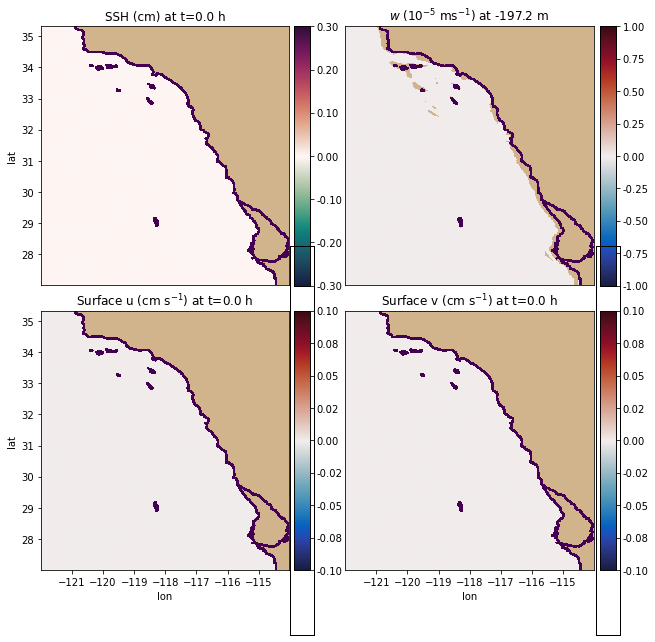

In [6]:
zz = 0
zz2 = 37

fig = plt.figure(figsize=(10,10))
gs = GridSpec(2,2, width_ratios=[1,1], wspace=0.2, hspace=0.1)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
for ax in [ax1,ax2]:
    ax.set_xticks([])
for ax in [ax2,ax4]:
    ax.set_yticks([])
    
# Uncomment lines below to run and save animation
anim = animation.FuncAnimation(fig, animate, init_func=init, blit=False,
                               frames=200, repeat=False)
anim.save('CTWs_surface.mov', writer=writer, dpi=500)

In [7]:
19*6

114

In [8]:
24*15

360

In [9]:
10*24

240

In [10]:
5*24

120